In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap

In [3]:
data = pd.read_csv('/kaggle/input/adl-classification/dataset.csv', names=['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'CO2'])
data

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [4]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['CO2']
    X = df.drop('CO2', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [6]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [7]:
acc = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 94.40%


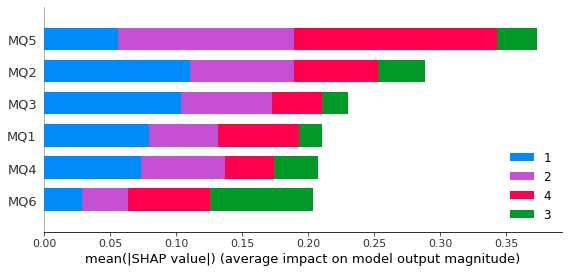

In [9]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names = model.classes_)

In [11]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train.drop('MQ5', axis = 1), y_train)

RandomForestClassifier(random_state=1)

In [13]:
acc = model.score(X_test.drop('MQ5', axis = 1), y_test)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 92.78%


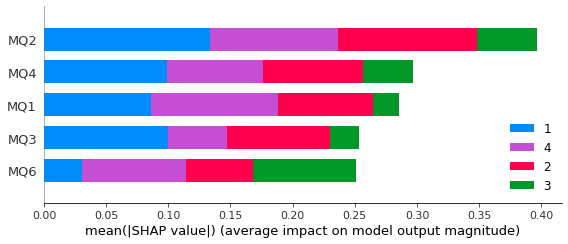

In [16]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.drop('MQ5', axis = 1))
shap.summary_plot(shap_values, X_test.drop('MQ5', axis = 1), class_names = model.classes_)